In [1]:
#!pip list
# #pip install pandas
# pip install matplotlib
# pip install ipywidgets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, clear_output

In [2]:
# Load the CSV file into a dataframe
df = pd.read_csv('/Users/nagendra_subramanya@optum.com/Library/CloudStorage/OneDrive-Krishna/Nagendra/SelfCode/DatabaseInCSV/DailyLogSummaryForEachDay.csv')

# Display the first few rows of the dataframe
print(df.sort_values(by='ActivityDate', ascending=False).head())

               Category         ActivityDate  TotalValue
11291          SelfCode  2025-12-01 00:00:00         0.0
11294  FitbitDailySteps  2025-12-01 00:00:00         0.0
11293          SelfSong  2025-12-01 00:00:00         0.0
11292          SelfTech  2025-12-01 00:00:00         0.5
11290          SelfHelp  2025-12-01 00:00:00         0.5


In [3]:
# Group by 'Category' and calculate the required statistics
stats_by_category = df.groupby('Category').agg(
    TotalSum=('TotalValue', 'sum'),
    TotalCount=('TotalValue', 'count'),
    Average=('TotalValue', 'mean'),
    Median=('TotalValue', 'median')
).reset_index()

# Round the numerical columns to 2 decimal places
stats_by_category[['TotalSum', 'Average', 'Median']] = stats_by_category[['TotalSum', 'Average', 'Median']].round(2)

# Calculate zero and non-zero entries grouped by 'Category'
zero_scores = df[df['TotalValue'] == 0].groupby('Category').size().reset_index(name='Zeros')
non_zero_scores = df[df['TotalValue'] != 0].groupby('Category').size().reset_index(name='NonZeros')

# Merge zero and non-zero scores with the main stats dataframe
stats_by_category = stats_by_category.merge(zero_scores, on='Category', how='left').merge(non_zero_scores, on='Category', how='left')

# Fill NaN values with 0 for ZeroScores and NonZeroScores
stats_by_category[['Zeros', 'NonZeros']] = stats_by_category[['Zeros', 'NonZeros']].fillna(0).astype(int)

# Calculate zero and non-zero percentages
stats_by_category['ZeroP'] = ((stats_by_category['Zeros'] / stats_by_category['TotalCount']) * 100).round(2)
stats_by_category['NonZeroP'] = ((stats_by_category['NonZeros'] / stats_by_category['TotalCount']) * 100).round(2)

# Display the result
# Use the to_string() method to print the entire dataframe in a single table with all columns in one line
print(stats_by_category.to_string(index=False))



        Category    TotalSum  TotalCount  Average  Median  Zeros  NonZeros  ZeroP  NonZeroP
FitbitDailySteps 35933564.00        3475 10340.59 10372.0     82      3393   2.36     97.64
        SelfCode      322.50        2259     0.14     0.0   1718       541  76.05     23.95
        SelfHelp     1102.75        2259     0.49     0.5    915      1344  40.50     59.50
        SelfSong      127.50        2259     0.06     0.0   1876       383  83.05     16.95
        SelfTech      622.25        2259     0.28     0.0   1392       867  61.62     38.38


In [4]:
df.groupby('Category').describe()

TotalValue                                                   \
                      count          mean          std  min     25%      50%   
Category                                                                       
FitbitDailySteps     3475.0  10340.593957  5701.918407  0.0  6096.5  10372.0   
SelfCode             2259.0      0.142762     0.358349  0.0     0.0      0.0   
SelfHelp             2259.0      0.488158     0.542276  0.0     0.0      0.5   
SelfSong             2259.0      0.056441     0.136876  0.0     0.0      0.0   
SelfTech             2259.0      0.275454     0.443453  0.0     0.0      0.0   

                                      
                       75%       max  
Category                              
FitbitDailySteps  14130.50  40645.00  
SelfCode              0.00      6.50  
SelfHelp              0.75      4.25  
SelfSong              0.00      1.00  
SelfTech              0.50      3.50

In [5]:
# Convert ActivityDate to datetime format
df['ActivityDate'] = pd.to_datetime(df['ActivityDate'])

# Extract year, quarter, month, and week from ActivityDate
df['Year'] = df['ActivityDate'].dt.year
df['Quarter'] = df['ActivityDate'].dt.to_period('Q').astype(str)
df['Month'] = df['ActivityDate'].dt.strftime('%Y-%m-%b')
df['Week'] = df['ActivityDate'].dt.strftime('%Y-Week%U')

# Group by Category and Year, Quarter, Month, Week to calculate the average TotalValue
yearly_avg = df.groupby(['Category', 'Year'])['TotalValue'].mean().reset_index()
quarterly_avg = df.groupby(['Category', 'Quarter'])['TotalValue'].mean().reset_index()
monthly_avg = df.groupby(['Category', 'Month'])['TotalValue'].mean().reset_index()
weekly_avg = df.groupby(['Category', 'Week'])['TotalValue'].mean().reset_index()

# Find the best year, quarter, month, and week for each category
best_year = yearly_avg.loc[yearly_avg.groupby('Category')['TotalValue'].idxmax(), ['Category', 'Year']]
best_quarter = quarterly_avg.loc[quarterly_avg.groupby('Category')['TotalValue'].idxmax(), ['Category', 'Quarter']]
best_month = monthly_avg.loc[monthly_avg.groupby('Category')['TotalValue'].idxmax(), ['Category', 'Month']]
best_week = weekly_avg.loc[weekly_avg.groupby('Category')['TotalValue'].idxmax(), ['Category', 'Week']]

# Merge the results into a single dataframe
best_stats = best_year.merge(best_quarter, on='Category').merge(best_month, on='Category').merge(best_week, on='Category')

# Rename columns for clarity
best_stats.columns = ['Category', 'BestYear', 'BestQuarter', 'BestMonth', 'BestWeek']

# Display the result
print(best_stats.to_string(index=False))


        Category  BestYear BestQuarter   BestMonth    BestWeek
FitbitDailySteps      2021      2021Q3 2021-09-Sep 2021-Week30
        SelfCode      2025      2024Q3 2020-08-Aug 2020-Week33
        SelfHelp      2022      2022Q2 2020-09-Sep 2023-Week53
        SelfSong      2025      2024Q3 2025-11-Nov 2025-Week45
        SelfTech      2023      2024Q3 2020-08-Aug 2020-Week33


In [6]:

# Group by Category and Year, Quarter, Month, Week to calculate the average TotalValue
yearly_sum = df.groupby(['Category', 'Year'])['TotalValue'].sum().reset_index()
quarterly_sum = df.groupby(['Category', 'Quarter'])['TotalValue'].sum().reset_index()
monthly_sum = df.groupby(['Category', 'Month'])['TotalValue'].sum().reset_index()
weekly_sum = df.groupby(['Category', 'Week'])['TotalValue'].sum().reset_index()



In [7]:
yearly_sum.loc[yearly_sum.groupby('Category')['TotalValue'].idxmax(), ['Category', 'Year','TotalValue']]

,Category,Year,TotalValue
5,FitbitDailySteps,2021,4672838.00
16,SelfCode,2025,86.00
20,SelfHelp,2022,236.75
29,SelfSong,2024,48.75
35,SelfTech,2023,156.25


In [8]:
best_month_sum = monthly_sum.loc[monthly_sum.groupby('Category')['TotalValue'].idxmax()]
print(best_month_sum)

             Category        Month  TotalValue
64   FitbitDailySteps  2021-09-Sep   483626.00
127          SelfCode  2020-08-Aug       23.50
204          SelfHelp  2020-09-Sep       34.75
342          SelfSong  2025-11-Nov       10.50
355          SelfTech  2020-08-Aug       25.00


In [9]:
best_week_sum = weekly_sum.loc[weekly_sum.groupby('Category')['TotalValue'].idxmax()]
print(best_week_sum)

              Category         Week  TotalValue
274   FitbitDailySteps  2021-Week30   131050.00
553           SelfCode  2020-Week33       11.25
884           SelfHelp  2020-Week35       11.25
1488          SelfSong  2025-Week45        3.50
1540          SelfTech  2020-Week33       10.00


In [10]:

# the yearlyy_avg has Category year and totalvalue , i want to plot the horizontal bar. the y axis will have year the horizonal bar will show length of total value. 
# i want the total value 
# to be shown on horizontal bar upto two decimal places make sure all the graph comes in single horizontal right next to each other one another

In [11]:
yearly_avg_sorted = yearly_avg.sort_values(by='Year', ascending=False)
yearly_avg_sorted


,Category,Year,TotalValue
37,SelfTech,2025,0.382836
23,SelfHelp,2025,0.549254
16,SelfCode,2025,0.256716
30,SelfSong,2025,0.135075
9,FitbitDailySteps,2025,12060.528358
8,FitbitDailySteps,2024,10333.136612
15,SelfCode,2024,0.165984
22,SelfHelp,2024,0.544399
29,SelfSong,2024,0.133197
36,SelfTech,2024,0.355191


In [12]:
monthly_avg

,Category,Month,TotalValue
0,FitbitDailySteps,2016-05-May,12087.750000
1,FitbitDailySteps,2016-06-Jun,11879.566667
2,FitbitDailySteps,2016-07-Jul,9539.903226
3,FitbitDailySteps,2016-08-Aug,12187.064516
4,FitbitDailySteps,2016-09-Sep,12400.733333
...,...,...,...
415,SelfTech,2025-08-Aug,0.282258
416,SelfTech,2025-09-Sep,0.700000
417,SelfTech,2025-10-Oct,0.403226
418,SelfTech,2025-11-Nov,0.391667


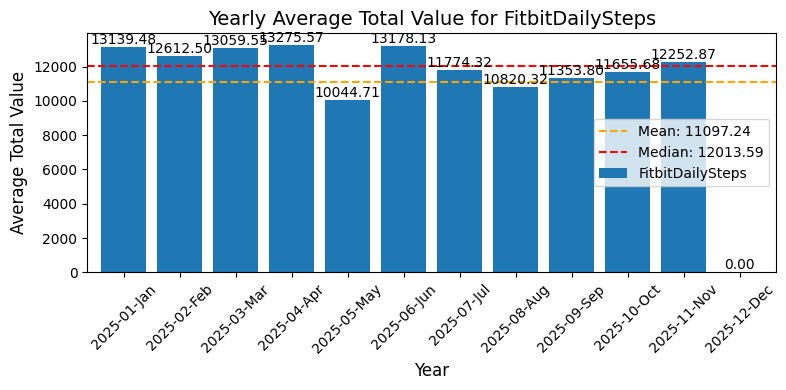

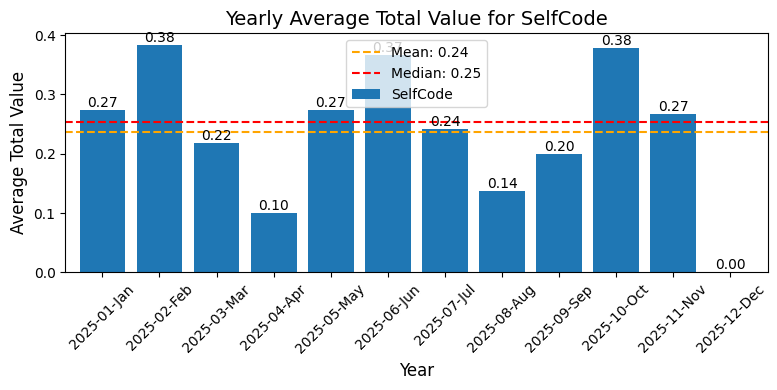

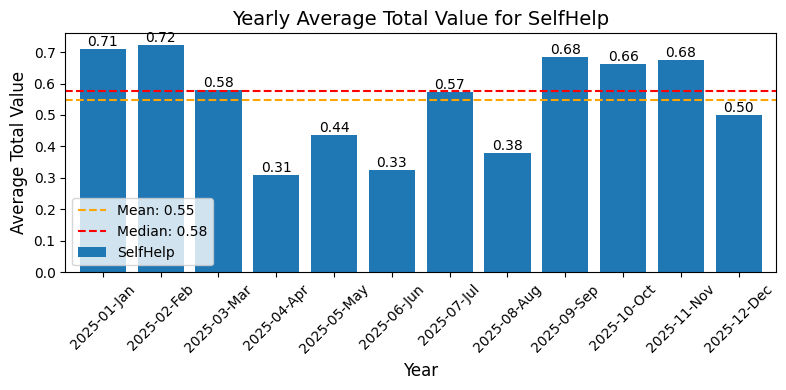

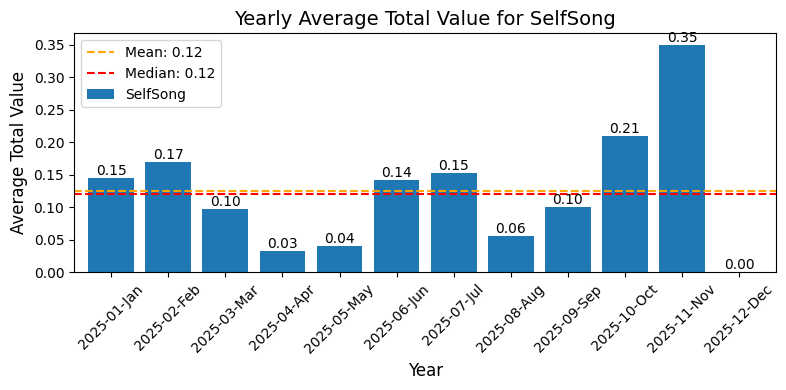

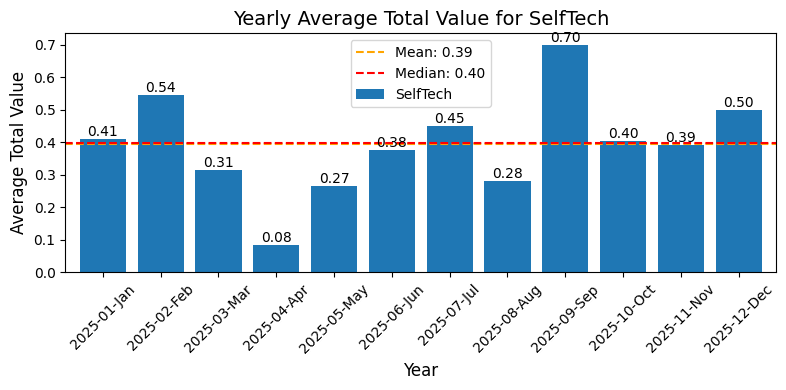

In [13]:
pivot_data = yearly_avg.pivot(index='Year', columns='Category', values='TotalValue')
# Filter monthly_avg for the current year
current_year = pd.Timestamp.now().year
monthly_avg_current_year = monthly_avg[monthly_avg['Month'].str.startswith(str(current_year))]

# Pivot the data for the current year
pivot_data = monthly_avg_current_year.pivot(index='Month', columns='Category', values='TotalValue')
# Iterate through each category and plot a separate graph
for category in pivot_data.columns:
    plt.figure(figsize=(8, 4))
    ax = pivot_data[category].dropna().plot(kind='bar', width=0.8)

    # Add labels and title
    plt.title(f'Yearly Average Total Value for {category}', fontsize=14)
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Average Total Value', fontsize=12)
    plt.xticks(rotation=45, fontsize=10)
    plt.tight_layout()

    # Calculate mean and median for the category
    mean_value = pivot_data[category].mean()
    median_value = pivot_data[category].median()

    # Plot mean as an orange dotted line
    plt.axhline(y=mean_value, color='orange', linestyle='--', linewidth=1.5, label=f'Mean: {mean_value:.2f}')

    # Plot median as a red dotted line
    plt.axhline(y=median_value, color='red', linestyle='--', linewidth=1.5, label=f'Median: {median_value:.2f}')

    # Annotate each bar with its value
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}', 
                    (p.get_x() + p.get_width() / 2, p.get_height()), 
                    ha='center', va='bottom', fontsize=10)

    # Add legend
    plt.legend(fontsize=10)

    # Show the plot
    plt.show()


In [14]:
top_10_records = df.sort_values(by='ActivityDate', ascending=False).head(10)
top_10_records.sort_values(by=['ActivityDate','Category'], ascending=[False, True])

,Category,ActivityDate,TotalValue,Year,Quarter,Month,Week
11294,FitbitDailySteps,2025-12-01,0.00,2025,2025Q4,2025-12-Dec,2025-Week48
11291,SelfCode,2025-12-01,0.00,2025,2025Q4,2025-12-Dec,2025-Week48
11290,SelfHelp,2025-12-01,0.50,2025,2025Q4,2025-12-Dec,2025-Week48
11293,SelfSong,2025-12-01,0.00,2025,2025Q4,2025-12-Dec,2025-Week48
11292,SelfTech,2025-12-01,0.50,2025,2025Q4,2025-12-Dec,2025-Week48
11289,FitbitDailySteps,2025-11-30,2336.00,2025,2025Q4,2025-11-Nov,2025-Week48
11286,SelfCode,2025-11-30,0.25,2025,2025Q4,2025-11-Nov,2025-Week48
11285,SelfHelp,2025-11-30,0.50,2025,2025Q4,2025-11-Nov,2025-Week48
11288,SelfSong,2025-11-30,0.50,2025,2025Q4,2025-11-Nov,2025-Week48
11287,SelfTech,2025-11-30,0.50,2025,2025Q4,2025-11-Nov,2025-Week48


/var/folders/59/35nd85z13ynb37313bsq35v00000gp/T/ipykernel_56178/3127839748.py:2: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  last_12_weeks = weekly_sum.groupby('Category').apply(lambda x: x.tail(12)).reset_index(drop=True)


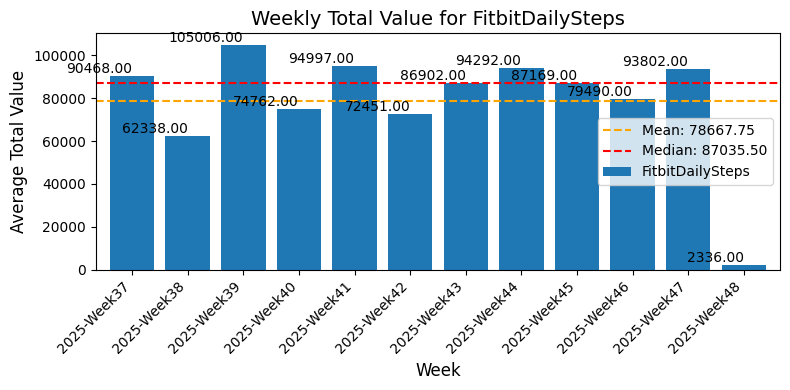

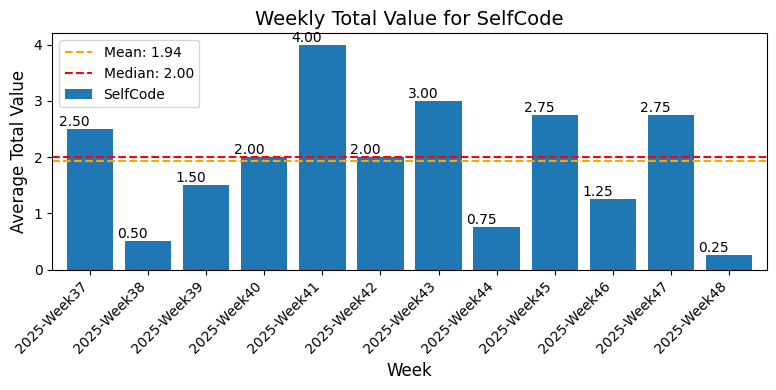

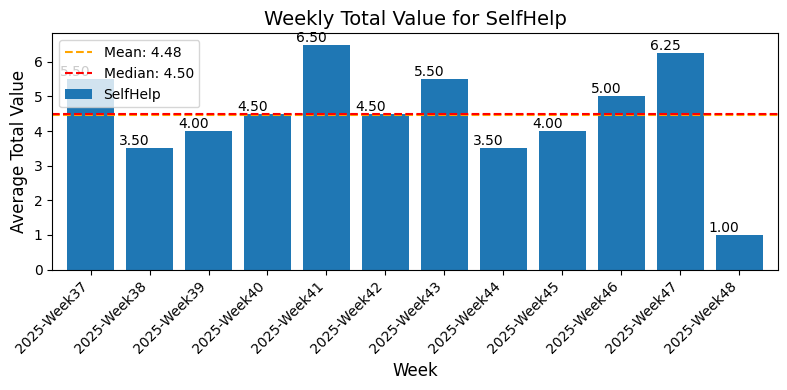

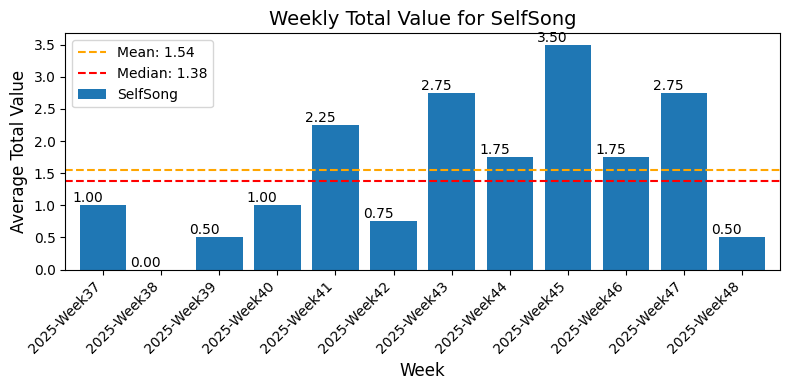

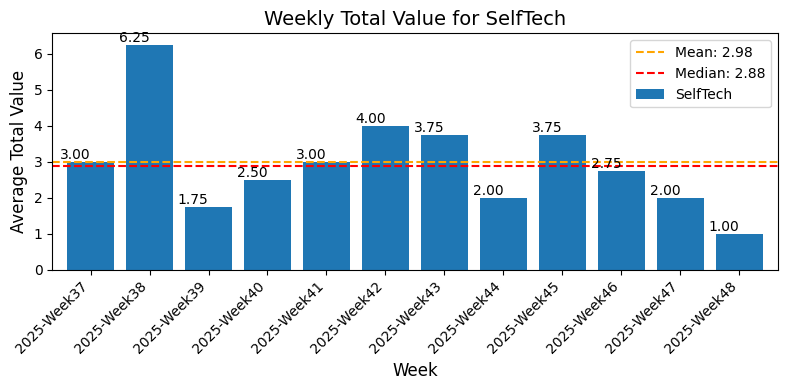

In [15]:
# Take the last 12 weeks data from weekly_avg
last_12_weeks = weekly_sum.groupby('Category').apply(lambda x: x.tail(12)).reset_index(drop=True)
last_12_weeks
# Pivot the data for the last 12 weeks
pivot_data = last_12_weeks.pivot(index='Week', columns='Category', values='TotalValue')


# Iterate through each category and plot a separate graph
for category in pivot_data.columns:
    plt.figure(figsize=(8, 4))
    ax = pivot_data[category].dropna().plot(kind='bar', width=0.8)

    # Add labels and title
    plt.title(f'Weekly Total Value for {category}', fontsize=14)
    plt.xlabel('Week', fontsize=12)
    plt.ylabel('Average Total Value', fontsize=12)
    plt.xticks(rotation=45, fontsize=10, ha='right')
    plt.tight_layout()

    # Calculate mean and median for the category
    mean_value = pivot_data[category].mean()
    median_value = pivot_data[category].median()

    # Plot mean as an orange dotted line
    plt.axhline(y=mean_value, color='orange', linestyle='--', linewidth=1.5, label=f'Mean: {mean_value:.2f}')

    # Plot median as a red dotted line
    plt.axhline(y=median_value, color='red', linestyle='--', linewidth=1.5, label=f'Median: {median_value:.2f}')

    # Annotate each bar with its value
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}', 
                    (p.get_x() + p.get_width() / 2, p.get_height()), 
                    ha='right', va='bottom', fontsize=10)

    # Add legend
    plt.legend(fontsize=10)

    # Show the plot
    plt.show()

In [16]:
pivot_data

Category,FitbitDailySteps,SelfCode,SelfHelp,SelfSong,SelfTech
Week,,,,,
2025-Week37,90468.0,2.50,5.50,1.00,3.00
2025-Week38,62338.0,0.50,3.50,0.00,6.25
2025-Week39,105006.0,1.50,4.00,0.50,1.75
2025-Week40,74762.0,2.00,4.50,1.00,2.50
2025-Week41,94997.0,4.00,6.50,2.25,3.00
2025-Week42,72451.0,2.00,4.50,0.75,4.00
2025-Week43,86902.0,3.00,5.50,2.75,3.75
2025-Week44,94292.0,0.75,3.50,1.75,2.00
2025-Week45,87169.0,2.75,4.00,3.50,3.75


In [17]:


# Create a function to plot the graph for a specific category
def plot_graph(category):
    clear_output(wait=True)  # Clear the output area
    plt.figure(figsize=(8, 4))
    ax = pivot_data[category].dropna().plot(kind='bar', width=0.8)

    # Add labels and title
    plt.title(f'Weekly Total Value for {category}', fontsize=14)
    plt.xlabel('Week', fontsize=12)
    plt.ylabel('Average Total Value', fontsize=12)
    plt.xticks(rotation=45, fontsize=10, ha='right')
    plt.tight_layout()

    # Calculate mean and median for the category
    mean_value = pivot_data[category].mean()
    median_value = pivot_data[category].median()

    # Plot mean as an orange dotted line
    plt.axhline(y=mean_value, color='orange', linestyle='--', linewidth=1.5, label=f'Mean: {mean_value:.2f}')

    # Plot median as a red dotted line
    plt.axhline(y=median_value, color='red', linestyle='--', linewidth=1.5, label=f'Median: {median_value:.2f}')

    # Annotate each bar with its value
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}', 
                    (p.get_x() + p.get_width() / 2, p.get_height()), 
                    ha='right', va='bottom', fontsize=10)

    # Add legend
    plt.legend(fontsize=10)

    # Show the plot
    plt.show()
    display(button_box)

# Create buttons for each category
buttons = []
for category in pivot_data.columns:
    button = widgets.Button(description=category)
    buttons.append(button)

    # Attach an event handler to the button
    button.on_click(lambda b, cat=category: plot_graph(cat))

# Display the buttons
button_box = widgets.HBox(buttons)
display(button_box)

In [18]:
# df.to_parquet('parquet')
# df.to_pickle('pickle')

<Axes: xlabel='Category'>

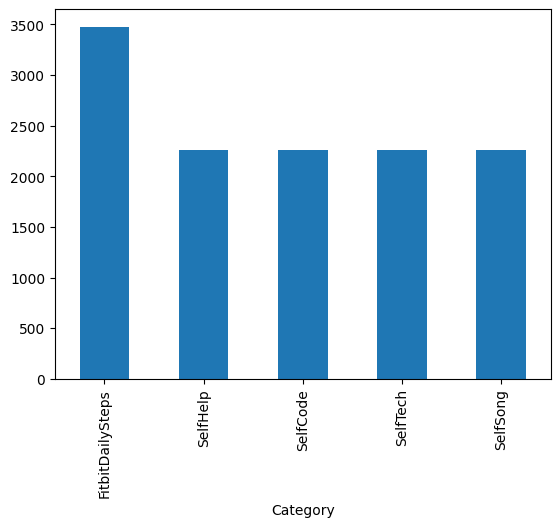

In [19]:
fig, ax = plt.subplots()
df['Category'].value_counts().plot(kind='bar')


### PIE Charts

In [20]:
df['NonZero'] = df['TotalValue'] != 0

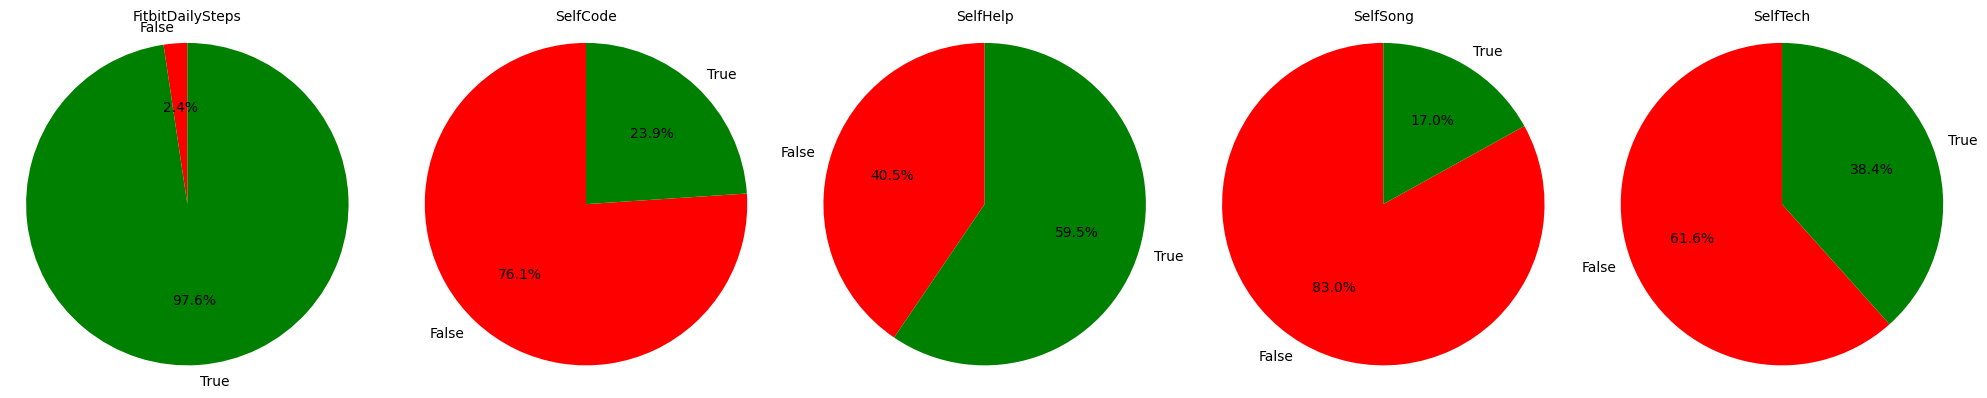

In [21]:
# pie chart examples good for boolean. https://www.youtube.com/watch?v=wUSDVGivd-8&t=30603s
# Group by Category and NonZero to calculate counts
nonzero_counts = df.groupby(['Category', 'NonZero']).size().unstack(fill_value=0)

# Set up the figure for compact pie charts
fig, axes = plt.subplots(1, len(nonzero_counts), figsize=(len(nonzero_counts) * 4, 4))

# Iterate through each category and plot a pie chart
for ax, category in zip(axes, nonzero_counts.index):
    values = nonzero_counts.loc[category]
    labels = ['False', 'True']
    colors = ['red', 'green']

    ax.pie(values, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90) #autopct='%1.1f%%' shows percentage values on chart.
    ax.set_title(category, fontsize=10)
    ax.axis('equal')  # Equal aspect ratio ensures the pie chart is circular

# Adjust layout to ensure charts fit in a single row
plt.tight_layout()
plt.show()

### plot points
### Adjust Text


In [22]:
df

,Category,ActivityDate,TotalValue,Year,Quarter,Month,Week,NonZero
0,SelfHelp,2019-09-26,0.0,2019,2019Q3,2019-09-Sep,2019-Week38,False
1,SelfCode,2019-09-26,0.0,2019,2019Q3,2019-09-Sep,2019-Week38,False
2,SelfTech,2019-09-26,0.0,2019,2019Q3,2019-09-Sep,2019-Week38,False
3,SelfSong,2019-09-26,0.0,2019,2019Q3,2019-09-Sep,2019-Week38,False
4,FitbitDailySteps,2019-09-26,18788.0,2019,2019Q3,2019-09-Sep,2019-Week38,True
...,...,...,...,...,...,...,...,...
12506,FitbitDailySteps,2019-09-21,2951.0,2019,2019Q3,2019-09-Sep,2019-Week37,True
12507,FitbitDailySteps,2019-09-22,178.0,2019,2019Q3,2019-09-Sep,2019-Week38,True
12508,FitbitDailySteps,2019-09-23,9480.0,2019,2019Q3,2019-09-Sep,2019-Week38,True
12509,FitbitDailySteps,2019-09-24,17715.0,2019,2019Q3,2019-09-Sep,2019-Week38,True


### Histogram

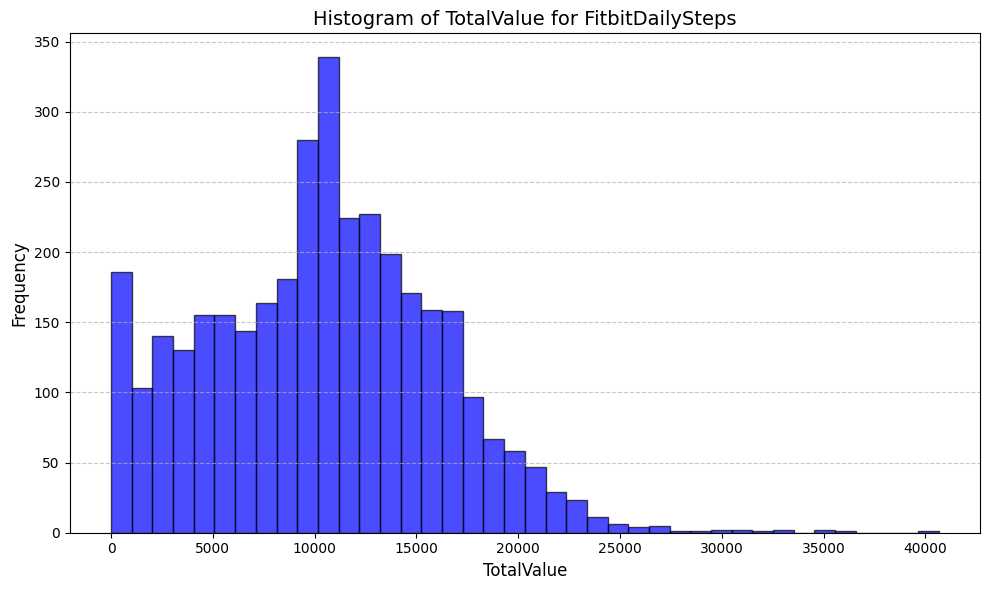

In [23]:
# Filter the dataframe for the 'FitbitDailySteps' category
fitbit_data = df[df['Category'] == 'FitbitDailySteps']
# fitbit_data = df[df['Category'] == 'SelfHelp']
# Plot the histogram for the 'TotalValue' column
plt.figure(figsize=(10, 6))
plt.hist(fitbit_data['TotalValue'], bins=40, color='blue', alpha=0.7, edgecolor='black')

# Add labels and title
plt.title('Histogram of TotalValue for FitbitDailySteps', fontsize=14)
plt.xlabel('TotalValue', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

### Boxplot

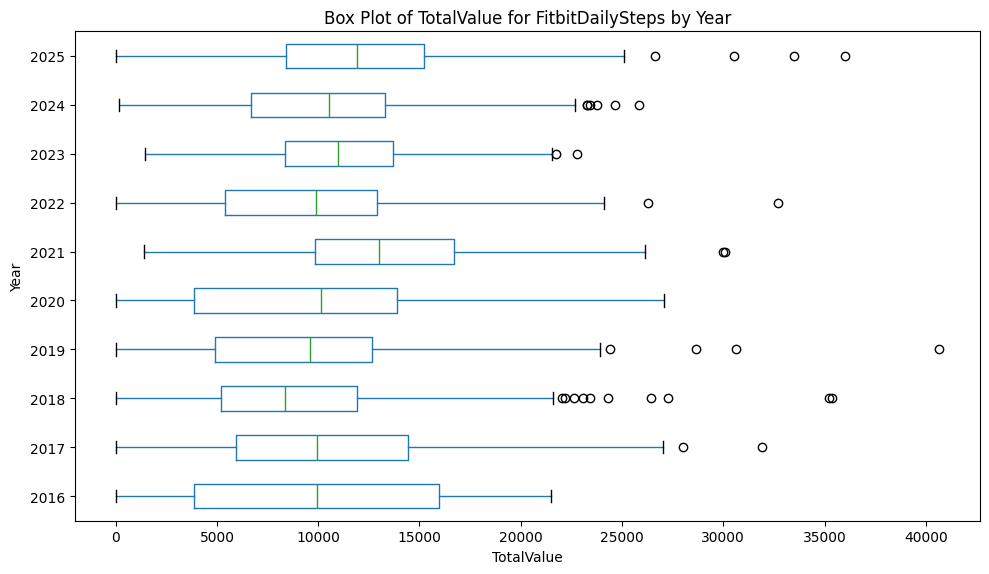

In [24]:
# Filter the dataframe for the 'FitbitDailySteps' category
fitbit_data = df[df['Category'] == 'FitbitDailySteps']
fitbit_data.head()
fitbit_data.boxplot(column='TotalValue', by='Year', figsize=(10, 6), vert=False, grid=False)
plt.title('Box Plot of TotalValue for FitbitDailySteps by Year')
plt.suptitle('')  # Suppress the default title to avoid duplication
plt.xlabel('TotalValue')
plt.ylabel('Year')
plt.tight_layout()
plt.show()